In [1]:
from moabb.datasets import SSVEPExo

dataset = SSVEPExo()
dataset.download()
dataset.get_data()
subj,session,run = 7, 'session_0', 'run_0'
raw = dataset.get_data(subjects=[subj])[subj][session][run]
sphere=(0,-25,0,100)
raw

<Raw | subject07_run1_raw.fif, 9 x 63040 (246.2 s), ~4.3 MB, data loaded>

Effective window size : 8.000 (s)


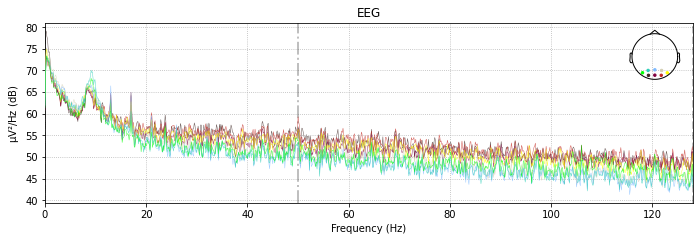

In [2]:
_ = raw.plot_psd(sphere=sphere)

In [3]:
_ = raw.set_eeg_reference('average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Effective window size : 8.000 (s)


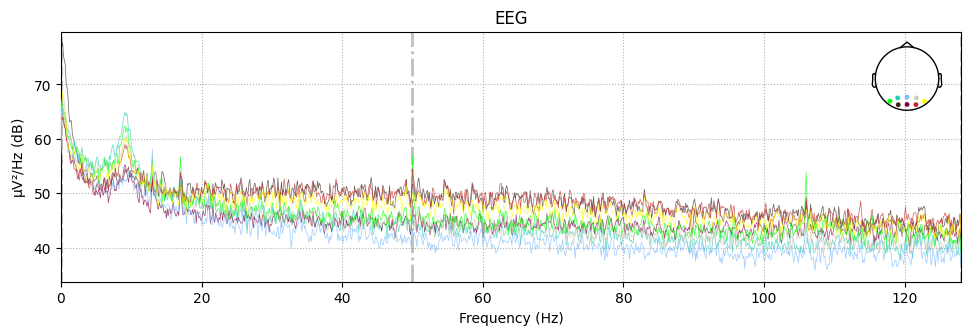

In [4]:
_ = raw.plot_psd(sphere=sphere)

In [5]:
powerline_freq = 50
_ = raw.notch_filter([50,100])

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)



Effective window size : 8.000 (s)


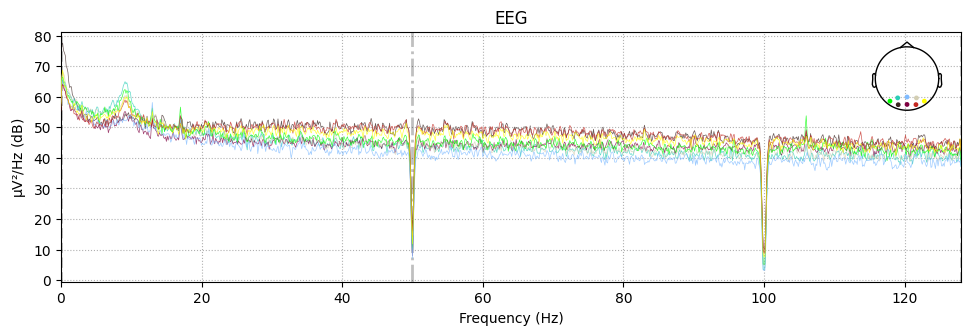

In [6]:
_ = raw.plot_psd(sphere=sphere)

In [7]:
# ICA?

In [8]:
from mne import find_events, Epochs

events = find_events(raw)
event_id = {
    'rest': 1,
    'target/13Hz': 2,
    'target/21Hz': 3,
    'target/17Hz': 4,

}
epochs = Epochs(raw, events=events, event_id=event_id, tmin=-3, tmax=5, baseline=(None,0), preload=True)

32 events found
Event IDs: [1 2 3 4]
Not setting metadata
32 matching events found
Setting baseline interval to [-3.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 32 events and 2049 original time points ...
0 bad epochs dropped


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


/tmp/ipykernel_92969/829026560.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


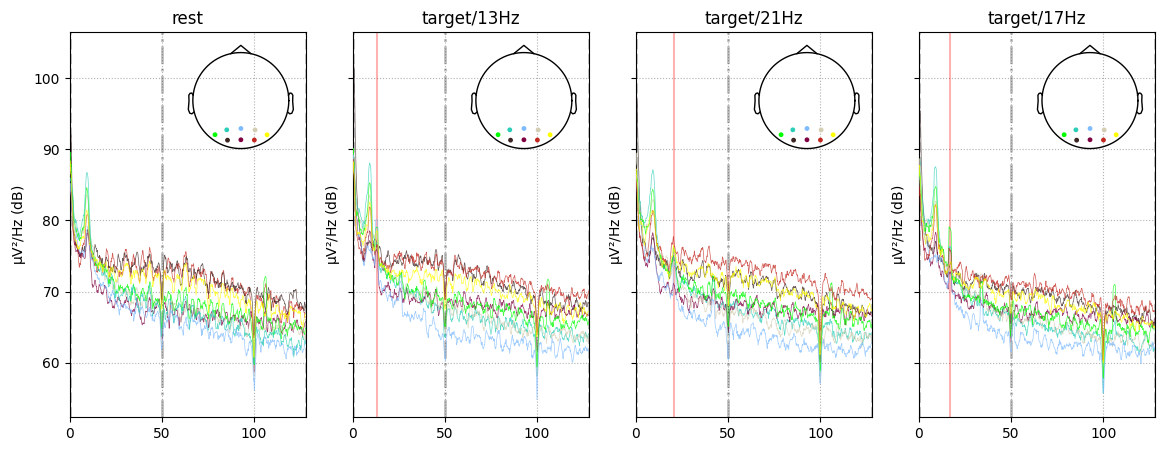

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,4, figsize=(14,5), sharex=True, sharey=True)
for i,label in enumerate(event_id.keys()):
    axs[i].axvline([0,13,21,17][i], color='red', alpha=0.3)
    epochs[label].plot_psd(
        sphere=sphere, tmin=0, tmax=None, show=False, ax=axs[i],
    )
    axs[i].set_title(label)
fig.show()

In [10]:
import numpy as np
from mne.time_frequency import tfr_multitaper
freqs = np.array([13,13*2,13*3,17,17*2,17*3,21,21*2,21*3])
n_cycles = freqs*3
epochs_tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=n_cycles, average=False, return_itc=False)
epochs_tfr

Not setting metadata


<EpochsTFR | time : [-3.000000, 5.000000], freq : [13.000000, 63.000000], epochs : 32, channels : 8, ~36.0 MB>

No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


/tmp/ipykernel_92969/3981664420.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


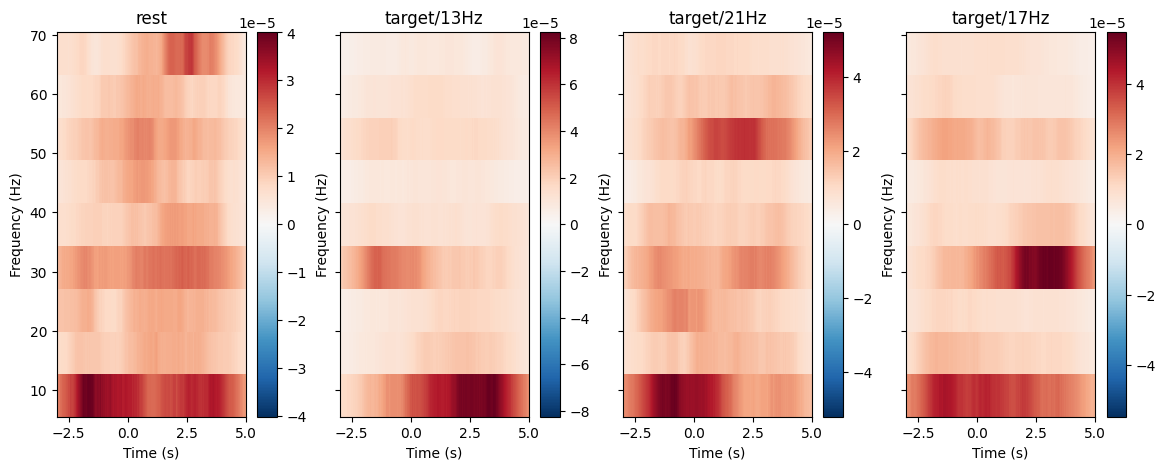

In [11]:
#fig, axs = plt.subplots(1,4, figsize=(14,5), sharex=True, sharey=True)
#for i,label in enumerate(event_id.keys()):
#    avg_all_chans = epochs_tfr[label].average().plot(show=False, combine='mean', axes=axs[i])
#    axs[i].set_title(label)
#fig.show()

/tmp/ipykernel_92969/4138044840.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


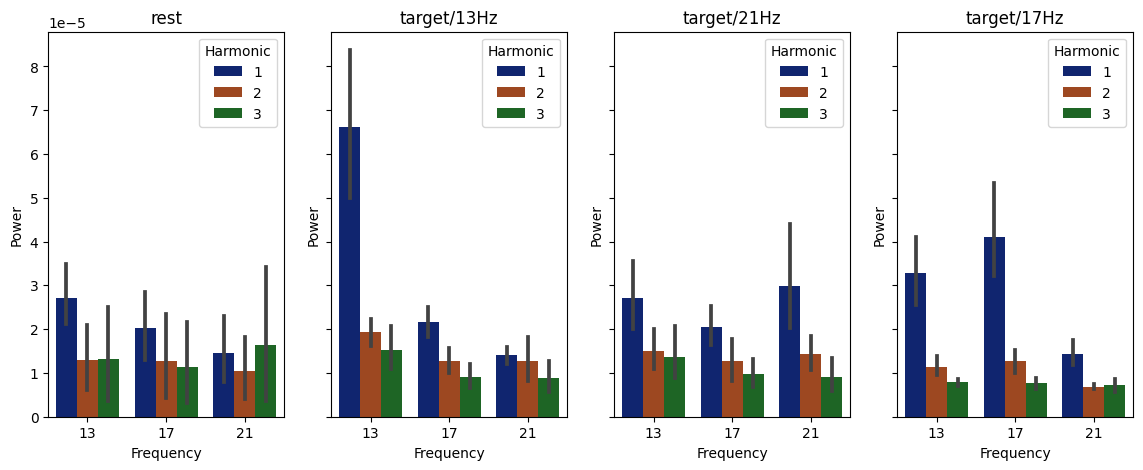

In [12]:
import seaborn as sns
import pandas as pd

fig, axs = plt.subplots(1,4, figsize=(14,5), sharex=True, sharey=True)

for i,label in enumerate(event_id.keys()):
    post_stim = epochs_tfr[label].crop(tmin=0)
    avg_chan_power = post_stim.data.mean(axis=(1,3))
    df = pd.DataFrame(avg_chan_power.T, columns=epochs.ch_names[:-1])
    df['Frequency'] = [13,13,13,17,17,17,21,21,21]
    df['Harmonic'] = [1,2,3,1,2,3,1,2,3]
    df = df.melt(id_vars=[ 'Frequency', 'Harmonic',], value_vars=epochs.ch_names[:-1], value_name='Power')
    sns.barplot(data=df, x='Frequency', hue='Harmonic', y='Power', ax=axs[i], palette="dark")
    axs[i].set_title(label)
fig.show()

In [13]:
epochs_tfr.apply_baseline((-2.5, 0), mode='zlogratio')

Applying baseline correction (mode: zlogratio)


<EpochsTFR | time : [-3.000000, 5.000000], freq : [13.000000, 63.000000], epochs : 32, channels : 8, ~36.0 MB>

No baseline correction applied
No baseline correction applied
No baseline correction applied
No baseline correction applied


/tmp/ipykernel_92969/3933182872.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


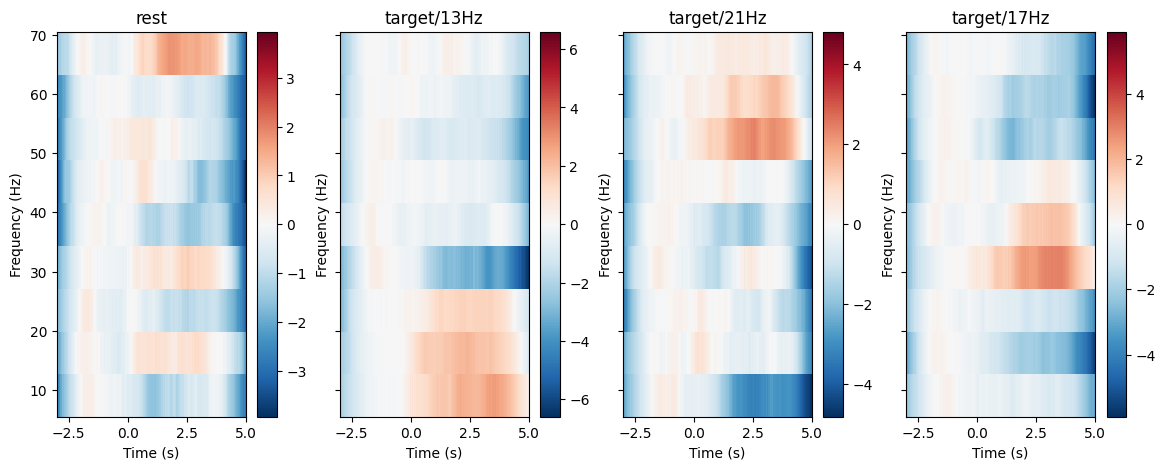

In [14]:
#fig, axs = plt.subplots(1,4, figsize=(14,5), sharex=True, sharey=True)

#for i,label in enumerate(event_id.keys()):
#    avg_all_chans = epochs_tfr[label].average().plot(show=False, combine='mean', axes=axs[i])
#    axs[i].set_title(label)
#fig.show()

/tmp/ipykernel_92969/288077287.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


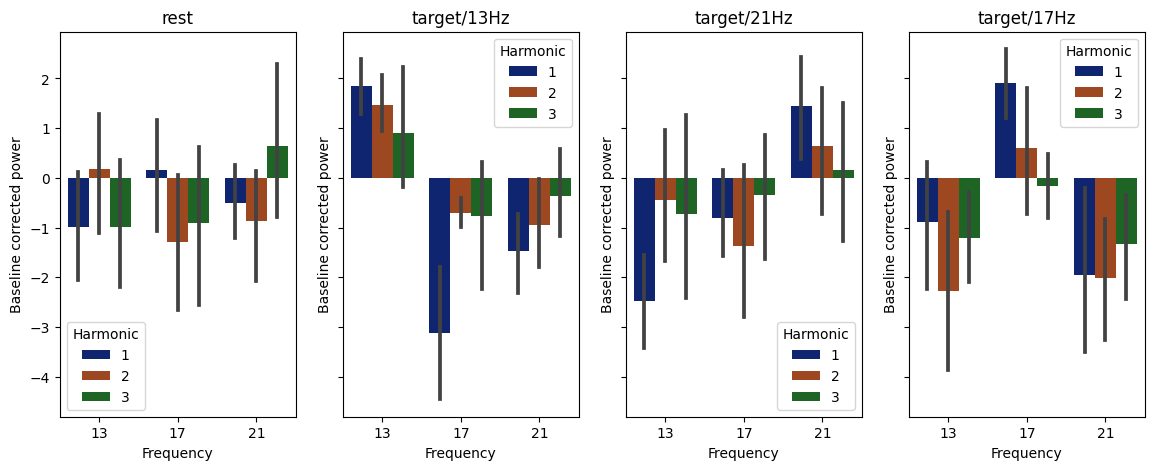

In [15]:
import seaborn as sns
import pandas as pd

fig, axs = plt.subplots(1,4, figsize=(14,5), sharex=True, sharey=True)

for i,label in enumerate(event_id.keys()):
    post_stim = epochs_tfr[label].crop(tmin=0)
    avg_chan_power = post_stim.data.mean(axis=(1,3))
    df = pd.DataFrame(avg_chan_power.T, columns=epochs.ch_names[:-1])
    df['Frequency'] = [13,13,13,17,17,17,21,21,21]
    df['Harmonic'] = [1,2,3,1,2,3,1,2,3]
    df = df.melt(id_vars=[ 'Frequency', 'Harmonic',], value_vars=epochs.ch_names[:-1], value_name='Baseline corrected power')
    sns.barplot(data=df, x='Frequency', hue='Harmonic', y='Baseline corrected power', ax=axs[i], palette="dark")
    axs[i].set_title(label)
fig.show()